<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


<img src="https://i.imgur.com/yvBtRtJ.png" width="600">

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")

In [3]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

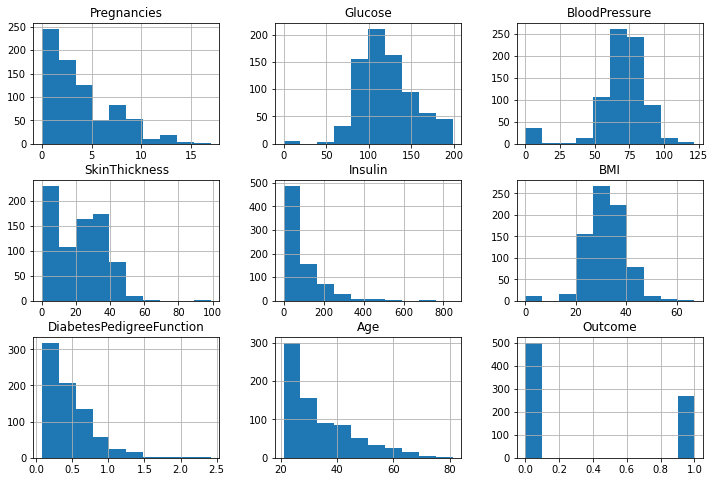

In [5]:
df.hist(figsize = (12,8))

## 학습과 예측 전체 과정

* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)


## 학습, 예측 데이터셋 나누기

In [6]:
df.shape

(768, 9)

In [7]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0]*0.8)
split_count

614

In [8]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count]
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [9]:
test = df[split_count:]
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
train.shape[0] + test.shape[0] == df.shape[0]

True

## 정답값이자 예측해야 될 값

In [11]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측에 사용할 컬럼

In [12]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 학습, 예측 데이터셋 만들기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [13]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [14]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.head(3)

0    1
1    0
2    1
Name: Outcome, dtype: int64

In [15]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30


In [16]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head(3)

(154,)


614    1
615    0
616    0
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)


* 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.
* 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
* 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
* 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
* 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
* 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 10,
                               max_features= 0.9,
                               random_state = 42,
                                ) # max_depth 하는이유 과대 적합
model

DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=42)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [19]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

In [20]:
# gini

1 - ((401/614) ** 2) - ((213/614) ** 2) # 지니계수가 0이면 트리 정지

0.45312417107873837

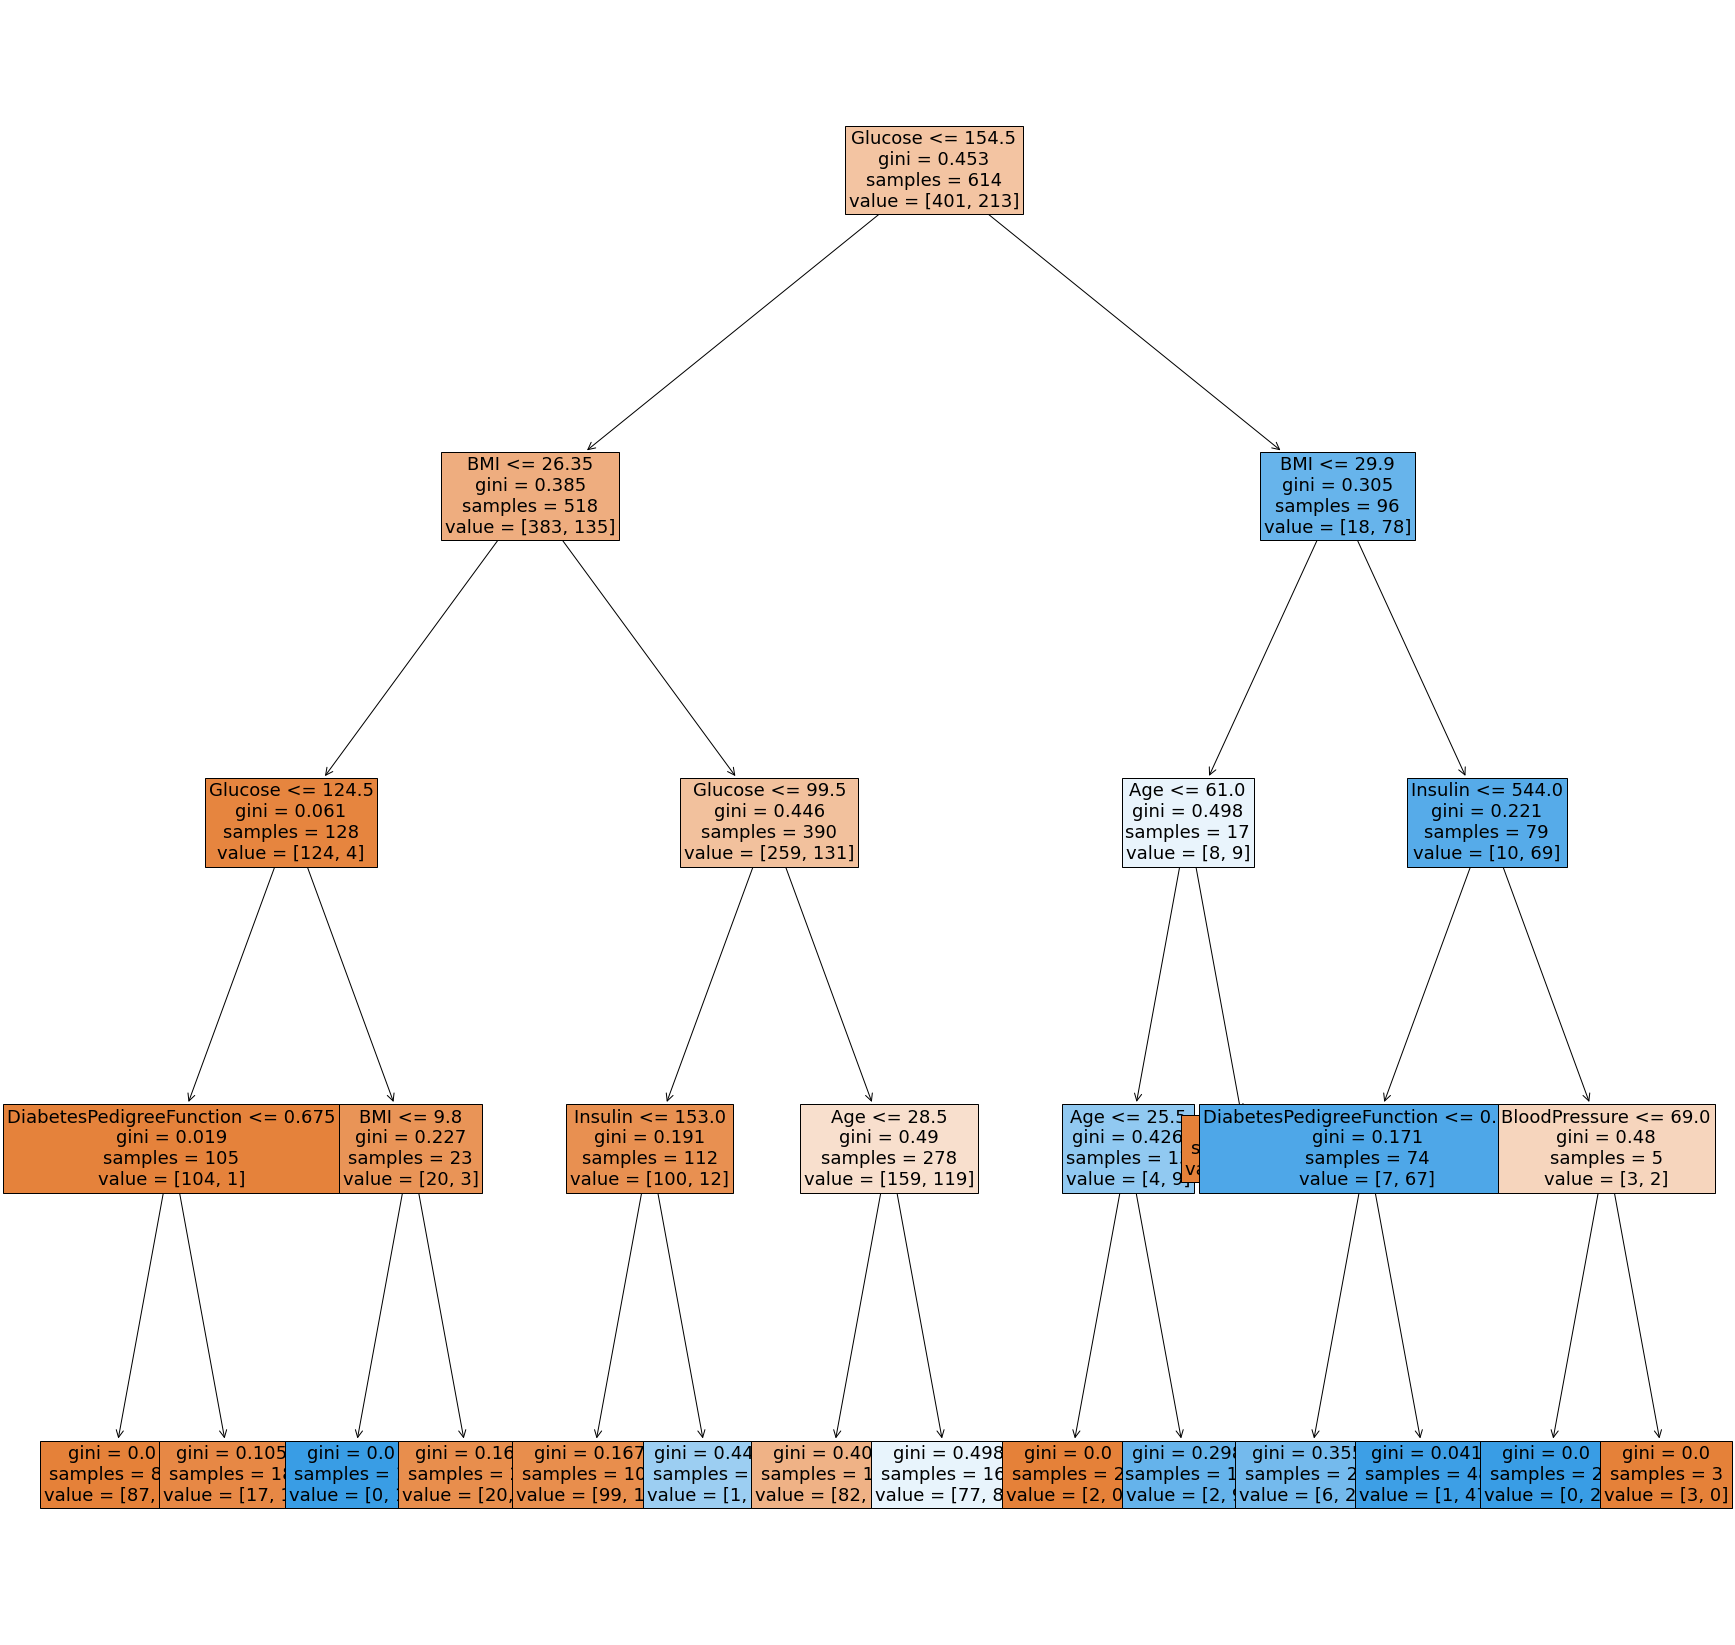

In [37]:
# plot_tree 를 통해 시각화 합니다.
from sklearn.tree import plot_tree

plt.figure(figsize = (30,30))
plot_tree(model, filled = True, fontsize = 18, feature_names = feature_names)
plt.show()

In [22]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.07803166, 0.30206534, 0.09270866, 0.02912042, 0.04131805,
       0.24447093, 0.10500291, 0.10728203])

In [23]:
np.array(model.feature_importances_)

array([0.07803166, 0.30206534, 0.09270866, 0.02912042, 0.04131805,
       0.24447093, 0.10500291, 0.10728203])

<AxesSubplot:>

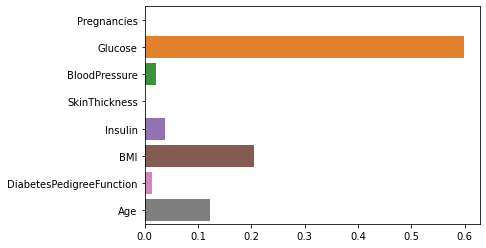

In [35]:
# 피처의 중요도 시각화 하기

sns.barplot(x = model.feature_importances_, y = feature_names)

## 정확도(Accuracy) 측정하기

* 모델이 얼마나 잘 예측했는지 측정해 봅니다.
* 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
* 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 이 실습은 정답이 있는 모의고사 입니다. 
* 모의고사를 보면 내 실력이 어느정도 되는지 예측해 보는 것처럼 점수를 측정해 봅니다.

In [25]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(y_test == y_predict).mean()*100


68.83116883116884

In [26]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)


0.6883116883116883

In [27]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test)

0.6883116883116883

In [28]:
model

DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=42)

In [29]:
m = 0
c = 0
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth = i,
                                   max_features= 1,
                                   random_state = 42,
                                    )
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    if m < (y_test == y_predict).mean()*100:
        m = (y_test == y_predict).mean()*100
        c = i
        
    
print(f'max_depth가 {c}일때 {m}')

max_depth가 4일때 74.67532467532467


In [30]:
z = [0.25, 0.5, 0.75, 0.9, 'sqrt', 'auto']
k = 0
for i in z:
    model = DecisionTreeClassifier(max_depth = c,
                                   max_features= i,
                                   random_state = 42,
                                    ) # max_depth 하는이유 과대 적합
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    if m < (y_test == y_predict).mean()*100:
        m = (y_test == y_predict).mean()*100
        k = i
        
print(f'max_depth 가 {c}이고 max_features가 {k}일때  {m}')

max_depth 가 4이고 max_features가 0.9일때  75.97402597402598


/Users/imyeongjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [34]:
r = 0
for i in range(1,100):
    model = DecisionTreeClassifier(max_depth = c,
                                   max_features= k,
                                   random_state = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    if m < accuracy_score(y_test, y_predict):
        m = accuracy_score(y_test, y_predict)
        r = i
        
print(f'max_depth 가 {c}이고 max_features가 {k}이고, random_state가 {r}일때 {m}')

max_depth 가 4이고 max_features가 0.9이고, random_state가 0일때 75.97402597402598


In [32]:
float(0.1)

0.1

In [33]:
float('0.1')

0.1